# The 1987 National Indonesia Contraceptive Prevalence Survey

#### 1. Identify the format of the raw data and read it into a dataframe correctly. Remember to provide a list of meaningful attribute names.

In [125]:
import pandas as pd

col_names = [
    'age', 
    'education', 
    'husband_education', 
    'children_num', 
    'religion', 
    'is_working', 
    'husband_occupation', 
    'living_index', 
    'media_exposure', 
    'contraceptive_method',
]

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data', header=None, names=col_names)
df.head()

,age,education,husband_education,children_num,religion,is_working,husband_occupation,living_index,media_exposure,contraceptive_method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [126]:
df.dtypes

age                     int64
education               int64
husband_education       int64
children_num            int64
religion                int64
is_working              int64
husband_occupation      int64
living_index            int64
media_exposure          int64
contraceptive_method    int64
dtype: object

#### 2. Normalize the `Age` attribute.

In [127]:
df['age'] = (df.age - df.age.min()) / (df.age.max() - df.age.min())
df.head()

,age,education,husband_education,children_num,religion,is_working,husband_occupation,living_index,media_exposure,contraceptive_method
0,0.242424,2,3,3,1,1,2,3,0,1
1,0.878788,1,3,10,1,1,3,4,0,1
2,0.818182,2,3,7,1,1,3,4,0,1
3,0.787879,3,2,9,1,1,3,3,0,1
4,0.606061,3,3,8,1,1,3,2,0,1


#### 3. Remove the column containing the information about religion.

In [128]:
df = df.drop('religion', axis=1)
df.head()

,age,education,husband_education,children_num,is_working,husband_occupation,living_index,media_exposure,contraceptive_method
0,0.242424,2,3,3,1,2,3,0,1
1,0.878788,1,3,10,1,3,4,0,1
2,0.818182,2,3,7,1,3,4,0,1
3,0.787879,3,2,9,1,3,3,0,1
4,0.606061,3,3,8,1,3,2,0,1


#### 4. Create a second dataframe containig only women with highest degree of education.

In [129]:
highest_degree = df.education.max()
highest_degree_df = df[df.education == highest_degree]
highest_degree_df.head()

,age,education,husband_education,children_num,is_working,husband_occupation,living_index,media_exposure,contraceptive_method
5,0.090909,4,4,0,1,3,3,0,1
12,0.848485,4,4,1,0,1,4,0,1
22,0.909091,4,4,1,1,1,4,0,1
23,0.696970,4,4,1,1,1,4,0,1
24,0.969697,4,4,5,1,1,4,0,1


#### 5. Recode the `Wife working now` attribute, changing 0 to 'no' and 1 to 'yes'.

In [130]:
df['is_working'] = df.is_working.map({0: 'no', 1: 'yes'})
df.head()

,age,education,husband_education,children_num,is_working,husband_occupation,living_index,media_exposure,contraceptive_method
0,0.242424,2,3,3,yes,2,3,0,1
1,0.878788,1,3,10,yes,3,4,0,1
2,0.818182,2,3,7,yes,3,4,0,1
3,0.787879,3,2,9,yes,3,3,0,1
4,0.606061,3,3,8,yes,3,2,0,1


#### 6. Compute the frequency of contraceptive methods grouping by the woman's education level.

In [131]:
df.groupby(['education', 'contraceptive_method']).size()

education  contraceptive_method
1          1                       103
           2                         9
           3                        40
2          1                       176
           2                        37
           3                       121
3          1                       175
           2                        80
           3                       155
4          1                       175
           2                       207
           3                       195
dtype: int64

#### 7. Create a new column which will contain the average degree of education between a wife and a husband.

In [132]:
df['marriage_education'] = df[['education', 'husband_education']].mean(axis=1)
df.head()

,age,education,husband_education,children_num,is_working,husband_occupation,living_index,media_exposure,contraceptive_method,marriage_education
0,0.242424,2,3,3,yes,2,3,0,1,2.5
1,0.878788,1,3,10,yes,3,4,0,1,2.0
2,0.818182,2,3,7,yes,3,4,0,1,2.5
3,0.787879,3,2,9,yes,3,3,0,1,2.5
4,0.606061,3,3,8,yes,3,2,0,1,3.0


#### 8. Create a new binary column which will indicate if a given woman has given birth to more than the average number of children.

In [133]:
children_num_avg = df.children_num.mean()
df['has_many_children'] = df.children_num > children_num_avg
df.head()

,age,education,husband_education,children_num,is_working,husband_occupation,living_index,media_exposure,contraceptive_method,marriage_education,has_many_children
0,0.242424,2,3,3,yes,2,3,0,1,2.5,False
1,0.878788,1,3,10,yes,3,4,0,1,2.0,True
2,0.818182,2,3,7,yes,3,4,0,1,2.5,True
3,0.787879,3,2,9,yes,3,3,0,1,2.5,True
4,0.606061,3,3,8,yes,3,2,0,1,3.0,True


#### 9. Change `Standard of living` column into an ordered category.

In [134]:
df['living_index'] = df.living_index.astype('category')
df.dtypes

age                      float64
education                  int64
husband_education          int64
children_num               int64
is_working                object
husband_occupation         int64
living_index            category
media_exposure             int64
contraceptive_method       int64
marriage_education       float64
has_many_children           bool
dtype: object

#### 10. Recode `Wife's education` attribute into a set of binary attributes using dummy variables.

In [135]:
pd.get_dummies(df.education)

,1,2,3,4
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
1468,0,0,0,1
1469,0,0,0,1
1470,0,0,1,0
1471,0,0,1,0


#### 11. Plot the histogram of the number of children.

<AxesSubplot:ylabel='Frequency'>

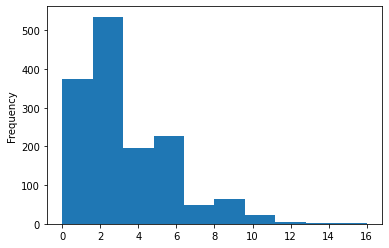

In [136]:
df.children_num.plot(kind='hist')

#### 12. Plot the bar chart of the standard of living.

<AxesSubplot:>

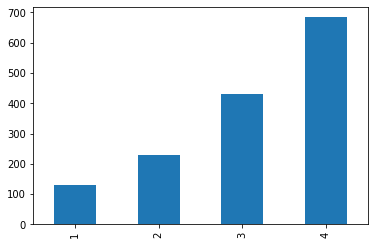

In [137]:
df.living_index.value_counts(ascending=True).plot(kind='bar')